# 실습 1. 접평면 그리기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

DELTA_X = 1e-5

def partial_derivative(f, tan_point, h=DELTA_X):

    df_dx = (f(tan_point[0] + h,tan_point[1]) - f(tan_point[0],tan_point[1]))/h
    df_dy = (f(tan_point[0],tan_point[1] + h) - f(tan_point[0],tan_point[1]))/h
    return df_dx, df_dy

def plot_tan_plane(f,tan_point,interval):
    x_space = np.linspace(*interval, 100)
    y_space = np.linspace(*interval, 100)
    X, Y = np.meshgrid(x_space, y_space)
    Z = f(X, Y)

    # derivative
    df_dx, df_dy = partial_derivative(f, tan_point)
    tan_plane = df_dx * (X - tan_point[0]) + df_dy * (Y - tan_point[1]) + f(tan_point[0], tan_point[1])

    # Create separate 3D plots for each function
    fig = plt.figure(figsize=(12, 6))

    # plot
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    ax1.plot_surface(X, Y, tan_plane, cmap='Reds', alpha=0.5)
    ax1.scatter(tan_point[0], tan_point[1], f(tan_point[0], tan_point[1]), marker='s', color='black', s=10)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')

    plt.tight_layout()
    plt.show()

In [ ]:
def func(x,y):
    return x**2 + y**2

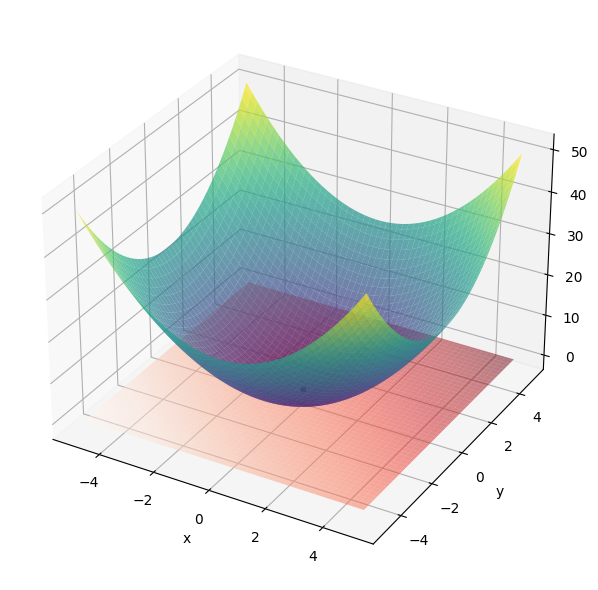

In [ ]:
plot_tan_plane(func, (0,0), (-5, 5))

# 2. 최적화 문제

In [ ]:
def func(x,y):
    return -x**4-y**4+x**3+3*x**2+y**2+(x*y)**2

[best_xy] :  (2.107264514244262, 1.6493226967845624)
[best_performance] :  10.360460742899496


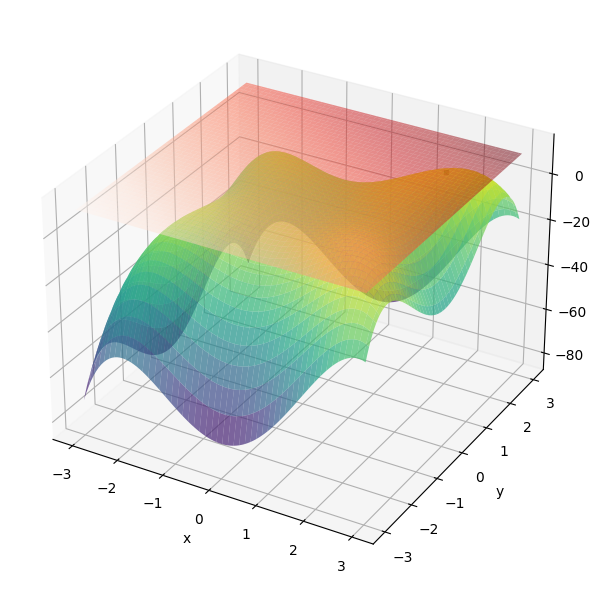

In [ ]:
EPSILON=1e-7

# def partial_derivative(f, tan_point, h=DELTA_X):
#     df_dx = (f(tan_point[0] + h,tan_point[1]) - f(tan_point[0],tan_point[1]))/h
#     df_dy = (f(tan_point[0],tan_point[1] + h) - f(tan_point[0],tan_point[1]))/h
#     return df_dx, df_dy
# x = -1.8856571639800264e+24
# y = 0 0.6663049278663726
def gradient_ascent(xy_start):
    la = 0.0001
    x = xy_start[0]
    y = xy_start[1]
    df_dx, df_dy = partial_derivative(func, (x,y), DELTA_X)
    # print(df_dx, df_dy)
    while(df_dx > EPSILON or df_dy > EPSILON):
      x = x + df_dx * la
      y = y + df_dy * la
      # error = np.abs(func(x, y) - 10.360460)
      # print(df_dx, df_dy)
      # print(df_dx - EPSILON, df_dy - EPSILON)
      # print(df_dx < EPSILON)
      # print(df_dy < EPSILON)
      # print(error)
      # if error < 0.5:
      # print(x,y)
      df_dx, df_dy = partial_derivative(func, (x,y), DELTA_X)
    return (x,y)



xy_start = (0, 0)
best_xy = gradient_ascent(xy_start)

print('[best_xy] : ', best_xy)
print('[best_performance] : ', func(best_xy[0],best_xy[1]))
plot_tan_plane(func, best_xy, (-3, 3))
# [best_xy] :  (-1.1072791040146202, 1.0549990491816015)

# 3. Hessian matrix를 구하고, local minimum인지 확인

In [ ]:
def determinant(matrix):
  matrix = np.array(matrix)
  sum = 0
  if matrix. size  == 4:
    return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
  elif matrix.size <= 9:
    # print(matrix)
    arr = np.delete(matrix, 0 , axis = 1)
    for i in range (0, 3):
      arr_ = np.delete(arr,i,axis = 0)
    #   print(i)
      sum = sum + np.power(-1, i) * matrix[i][0] * (arr_[0][0] * arr_[1][1] - arr_[0][1] * arr_[1][0])
    #   print(arr_)
    #   print(sum)
    return sum
  else:
    arr = np.delete(matrix, 0 , axis = 1)
    for i in range (0, len(matrix)):
      arr_ = np.delete(arr,i,axis = 0)
      sum = sum + np.power(-1, i) * matrix[i][0] * determinant(arr_)
    return sum

In [ ]:
# 0,0
best_x = 1.9987517881844639
best_y = 1.5199641732745133
# -5, 3
# best_x = -1.1072791040146202
# best_y = 1.0549990491816015

def fx_prime(x, y, h = DELTA_X):
  return (func(x + h, y) - func(x,y))/h

def fy_prime(x, y, h = DELTA_X):
  return (func(x, y + h) - func(x,y))/h

def partial_derivative_x(f, tan_point, h=DELTA_X):
  df_dx = (f(tan_point[0] + h, tan_point[1]) - f(tan_point[0],tan_point[1]))/h
  return df_dx

def partial_derivative_y(f, tan_point, h=DELTA_X):
  df_dy = (f(tan_point[0], tan_point[1] + h) - f(tan_point[0],tan_point[1]))/h
  return df_dy

# print(partial_derivative_x(fy_prime, (best_x, best_y)))
# print(partial_derivative_y(fx_prime, (best_x, best_y)))
# has = np.array([2, 3], [2, 3])
haseian = np.array([[partial_derivative_x(fx_prime, (best_x, best_y)), partial_derivative_x(fy_prime, (best_x, best_y))],
 [partial_derivative_y(fx_prime, (best_x, best_y)), partial_derivative_y(fy_prime,(best_x, best_y))]])

# print(haseian)
# print(determinant(haseian))
if (determinant(haseian) > 0 and partial_derivative_x(fx_prime, (best_x, best_y)) > 0 ):
  print("local minimun")
elif(determinant(haseian) > 0 and partial_derivative_x(fx_prime, (best_x, best_y)) < 0 ):
  print("local maximmun")

[[-25.3274024   12.15218148]
 [ 12.15218148 -17.73386771]]
301.47728869358326
local maximmun


이번 과제를 끝으로 인공지능 과제의 절반을 끝냈습니다. 현재까지의 수준은 인공지능을 입문하는데 너무 좋았습니다. 이번 과제의 extra점수를 받기위해 haseian에 대해 많이 공부했고, 2계도함수를 구현하는 방법에서 많이 헷갈려서 해당 문제를 구현하는데 집중했던 것 같습니다.